## Title: Data Manipulation and Analysis with Pandas, NumPy, and Matplotlib
### Data: Transjakarta Transaction - April 2023
Dummy data obtained from [Kaggle by dikisahkan](https://www.kaggle.com/datasets/dikisahkan/transjakarta-transportation-transaction)

### Introduction
Welcome to this notebook, where we will conduct a comprehensive exploration of data manipulation and analysis using the powerful Python libraries Pandas, NumPy, and Matplotlib.

### Table of Contents
1. Importing Libraries
2. Loading and Understanding Data
3. Data Cleansing
4. Data Manipulation and Visualization
    - Consumer Gender and Age
    - Consumer Paycard
    - Busway Corridor
    - Trip Analysis
5. Conclusion

### Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading and Understanding Data
**Loading the Data**

In [2]:
df = pd.read_csv("C:/Users/LENOVO/DA_Portfolio/dfTransjakarta.csv")

**Understanding the Data**

In [3]:
#exploring the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [4]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


Based on the provided details, the dataset comprises various data types, including **strings**, such as IDs, Paycard bank names, Names, Sex, Busway corridor names and IDs, Tap In/Out Stop names and IDs, and Tap In/Out times. Additionally, the dataset contains **numeric** data, such as Paycard IDs, Birthyear, Sequences, and Tap In/Out coordinates.

### Data Cleansing

In [5]:
#check the 'null' data
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

Based on the preceding statement, it is evident that the dataset contains a significant amount of missing or null data. Thus, we need to clean it.

In [6]:
#clean the null data by removing it
def checknull(data):
    if data.isna().sum().any():
        data.dropna(inplace=True)
    else:
        pass
    
#recheck it after removing the null value rows
checknull(df)
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

Now, the data has been cleaned; the 'null' values has been removed

### Data Manipulation and Visualization

**Gender and Age**

**Gender**

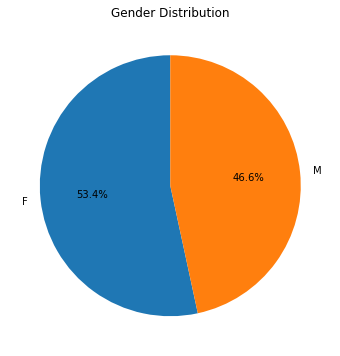

In [7]:
#for gender, we replace the string: M and F to numeric data, 0 for M and 1 for F
df['payCardSex'] = df['payCardSex'].replace({0: 'M', 1: 'F'})

#next, we count the gender and then visualize it
gender_count = df['payCardSex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

Based on the graph, it is evident that in April 2023, females comprised the majority of Transjakarta users, accounting for 53.4% of the total ridership. Conversely, males constituted a smaller portion, representing only 46.6% of the total ridership.

**Age**

Notes: Given that the dataset contains only birth year data and lacks age information, there is a need to derive the age data using the assumption that the base year is 2023. By subtracting the birth year from the base year, we can calculate the age of each individual in the dataset, thereby enriching the dataset with age-related information for further analysis and insights.

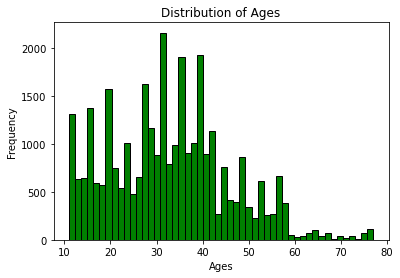

The most passenger is 31 years old
The average passenger age is 33 years old


In [8]:
base_year = 2023
df['ages'] = base_year - df['payCardBirthDate']

#visualize it
plt.hist(df['ages'], bins=50, edgecolor='black', color='green')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()

#we also need to count which passenger age is at the most
count_age = df['ages'].value_counts()
highest_count_age = count_age.idxmax()

print(f'The most passenger is {highest_count_age} years old')

#we also need to count the average
average_age = df['ages'].mean()
rounded_average_age = round(average_age)

print(f'The average passenger age is {rounded_average_age} years old')

According to the analysis of the graph and the provided information, the age group with the highest number of passengers is centered around 31 years old, which represents the peak age demographic among Transjakarta riders in April 2023. Additionally, it is observed that a significant number of passengers are aged around 33 years old, making it one of the prominent age groups in the dataset during the same period.

**Paycard**

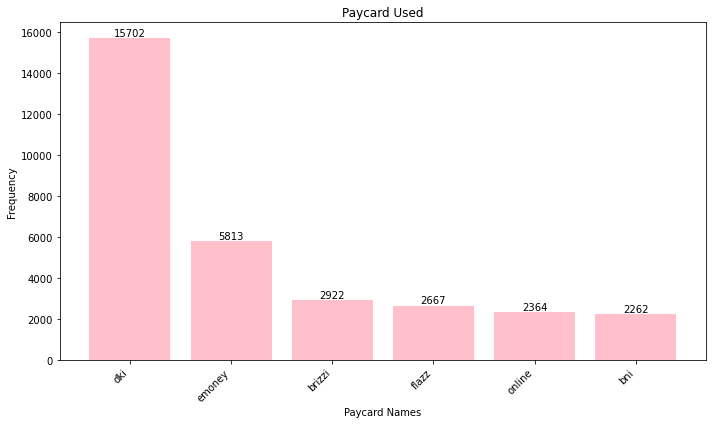

In [9]:
paycard = df['payCardBank'].value_counts()

#visualize it
plt.figure(figsize=(10, 6))
bars = plt.bar(paycard.index, paycard.values, color='pink')

plt.xlabel('Paycard Names')
plt.ylabel('Frequency')
plt.title('Paycard Used')
plt.xticks(rotation=45, ha='right')

# Add value labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')


plt.tight_layout()
plt.show()

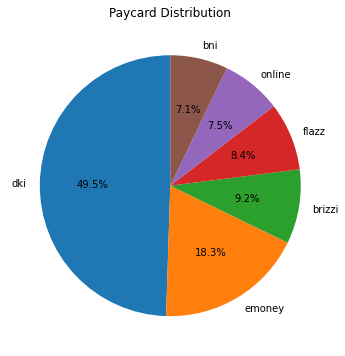

In [10]:
paycard_count = df['payCardBank'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(paycard_count, labels=paycard_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Paycard Distribution')
plt.show()

Based on the graphical representation, it is evident that Bank DKI's paycard was the most prevalent among Transjakarta riders in April 2023, accounting for 15,702 transactions, which corresponds to approximately 49.5% of the total passenger transactions. In contrast, Bank BNI's paycard had the lowest usage frequency, with a total count of 2,262 transactions, representing approximately 7.1% of the passenger transactions during the same period.

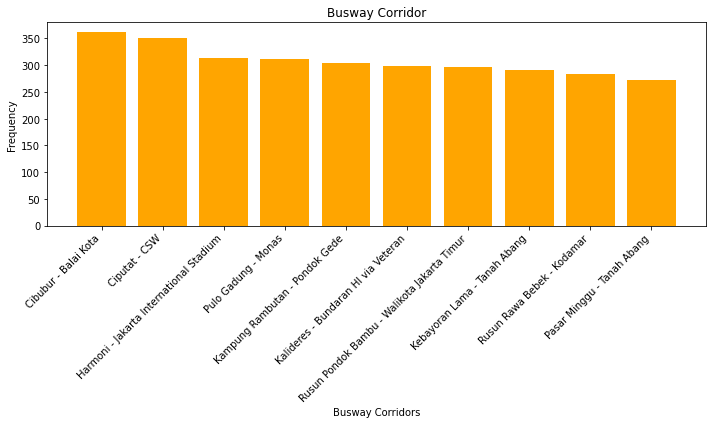

In [11]:
#next, I want to visualize the most visited busway corridor
corridor = df['corridorName'].value_counts()

#because there are a lot of busway corridor, I want to get the top 10 most active busway corridor
top10 = corridor.nlargest(10)

#visualize it
plt.figure(figsize=(10, 6))
plt.bar(top10.index, top10.values, color='orange')

plt.xlabel('Busway Corridors')
plt.ylabel('Frequency')
plt.title('Busway Corridor')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Trip Analysis**

**Trip Hour Analysis**

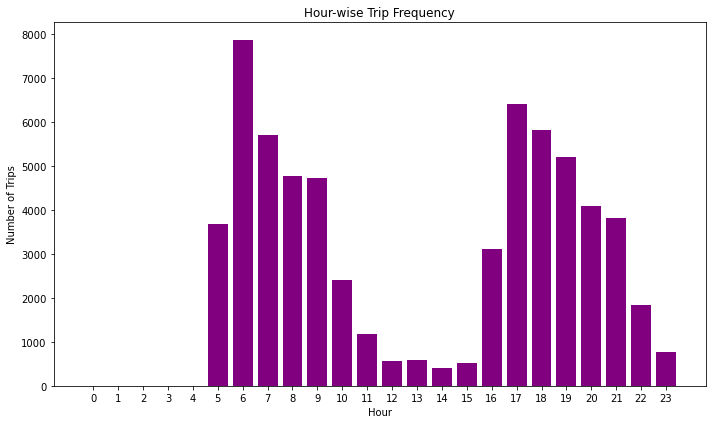

In [12]:
#Change the tapInTime and tapOutTime data to Pandas datetime format
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

#Extract the hour
df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour

#Calculate the trip duration
all_trip_hours = pd.concat([df['tapInHour'], df['tapOutHour']])

hour_counts = all_trip_hours.value_counts()

hour_counts = hour_counts.sort_index()

#Create a bar chart to visualize the hour-wise trip frequency
plt.figure(figsize=(10, 6))
plt.bar(hour_counts.index, hour_counts.values, color='purple')

plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Hour-wise Trip Frequency')
plt.xticks(range(24))  # Set x-axis ticks to show all hours (0 to 23)

plt.tight_layout()
plt.show()

Based on the graphical data, the time periods characterized by dense passenger activity are notably observed at 6:00 AM and 5:00 PM (17:00) hours. This commuting patterns associated with people traveling to and from their workplaces.

**Trip Duration Analysis**

            tapInTime  day_of_week
0 2023-04-03 05:21:44            0
1 2023-04-03 05:42:44            0
2 2023-04-03 05:59:06            0
3 2023-04-03 05:44:51            0
4 2023-04-03 06:17:35            0


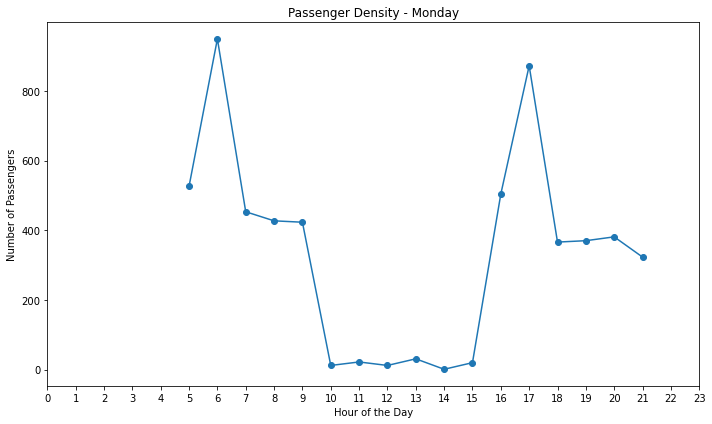

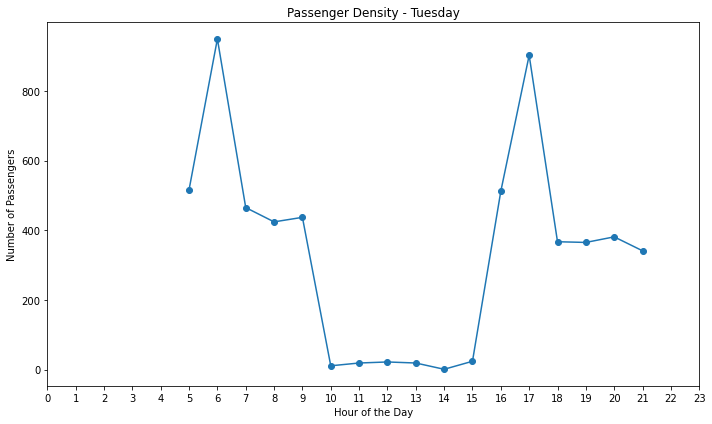

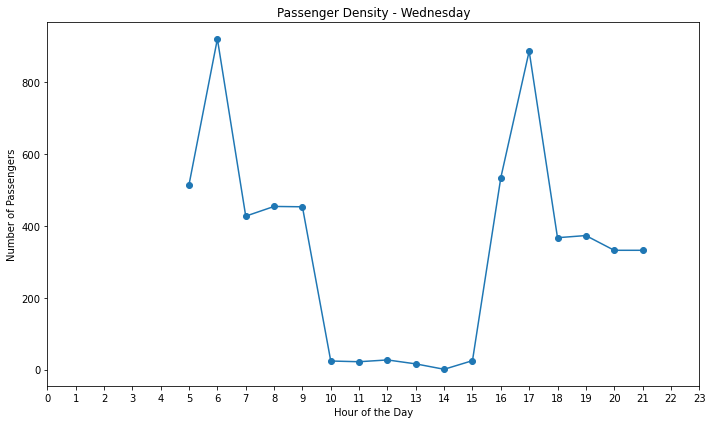

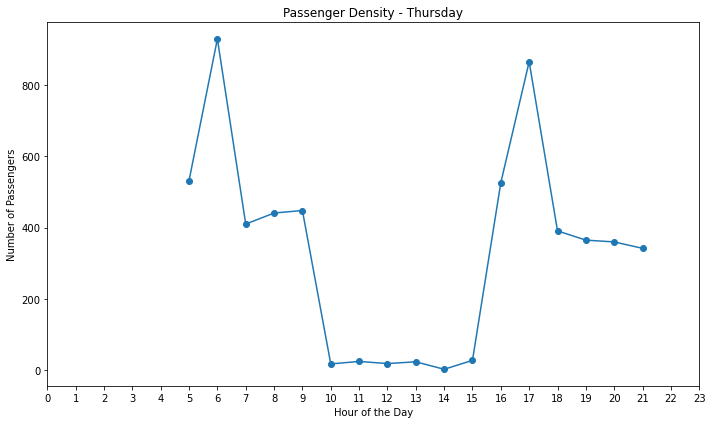

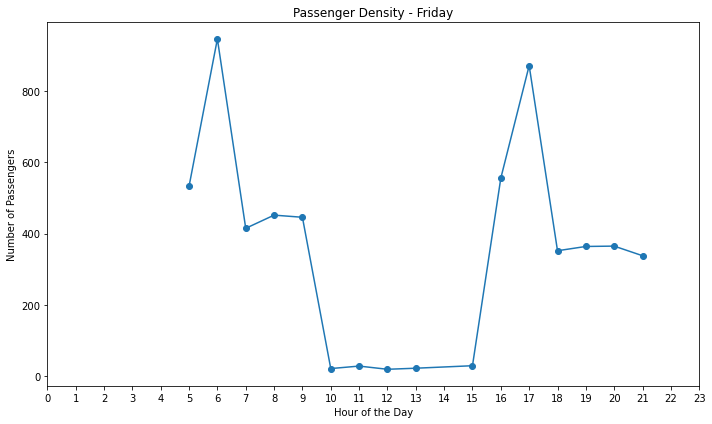

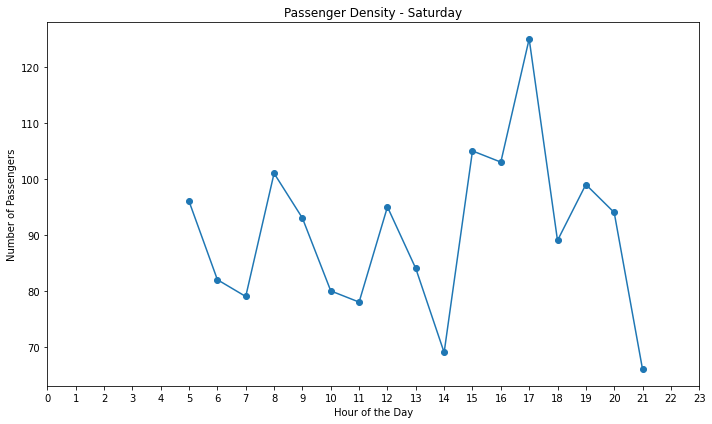

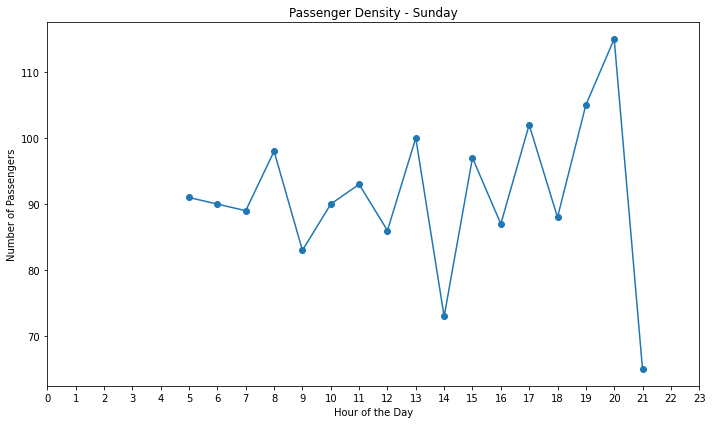

In [16]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

# Create a new column 'tapInHour' to store the hour of tap-in
df['tapInHour'] = df['tapInTime'].dt.hour

# Extract the day of the week from tap-in time
df['day_of_week'] = df['tapInTime'].dt.dayofweek

# Print the first few rows of the dataset including 'tapInTime' and 'day_of_week' columns
print(df[['tapInTime', 'day_of_week']].head()) #from this information, Monday is indexed as zero

# Map day of week integers to day names for labeling
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = df['day_of_week'].map(lambda x: day_names[x])

# Create a separate graph for each day of the week
for day in range(7):
    day_data = df[df['day_of_week'] == day]
    hourly_counts = day_data['tapInHour'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 6))
    plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
    
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Passengers')
    plt.title(f'Passenger Density - {day_names[day]}')
    plt.xticks(range(24))
    
    plt.tight_layout()
    plt.show()

Based on the depicted graph, passenger mobility patterns exhibit consistency from Monday to Friday, with heightened activity occurring predominantly at 6:00 AM and 5:00 PM (17:00). However, a notable contrast emerges during the weekends, specifically on Saturday and Sunday, when passenger activity shifts to peak periods around 8:00 AM and 8:00 PM (20:00). This pattern underscores the distinction between weekday and weekend travel behaviors.

### Conclusion

In our analysis of the Transjakarta ridership dataset for April 2023, we explored diverse aspects of passenger behavior. Notable findings include the predominance of females, aged around 31 to 33 years old, comprising the majority of ridership. Payment card usage highlighted Bank DKI's prominence with 49.5% of transactions, while weekend travel patterns diverged from weekdays. Specifically, 6:00 AM and 5:00 PM (17:00) emerged as peak travel hours on weekdays, aligning with work commutes, whereas weekends saw activity centered around 8:00 AM and 8:00 PM (20:00). These insights offer valuable information for understanding commuter dynamics and optimizing public transportation services.